<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>

- Introduction to spectral embedding and spectral clustering

<hr/>

<h1><font color="darkblue">Spectral Methods</font></h1>

## Statistical Learning

- The methods in general fall in these 4 categories

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |

- Spectral clustering and embedding: unsupervised methods


## Graph

<img src='https://momath.org/wp-content/uploads/2013/10/graph_theory-300x292.jpeg' width=200px align=right>

- Represent connections between objects

> **Vertex**: a node of the graph <br>
> **Edge**: a link between two nodes 

- A graph consists of a set of vertices and a set of edges

>$ G\,(V,E) $



## Similarity Graph

- Connect similar objects in a dataset

> Measure of similarity on the edges


## Simple Implementation

In [1]:
class vert(object):
    def __init__(self, data=None):
        self.data = data

class edge(object):
    def __init__(self, A, B, w=1):
        self.A, self.B = A, B
        self.w = w

In [2]:
V = [ vert('zero'), vert('one'), vert('two'), 
      vert('three'), vert('four') ] 

E = [ edge(V[0],V[1]), edge(V[0],V[2]), edge(V[0],V[3]), 
      edge(V[1],V[3]),
      edge(V[2],V[3]), edge(V[2],V[4]), 
      edge(V[3],V[4]) ]

for edge in E: 
    print (edge.A.data, '\t--<%.1f>--\t' % edge.w, edge.B.data)

zero 	--<1.0>--	 one
zero 	--<1.0>--	 two
zero 	--<1.0>--	 three
one 	--<1.0>--	 three
two 	--<1.0>--	 three
two 	--<1.0>--	 four
three 	--<1.0>--	 four


## Adjacency Matrix

- Are two vertices connected?

> Encode it in a $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

### For example

- The previous case becomes 

>$ A = \left( \begin{array}{ccc}
0 & 1 & 1 & 1 & 0  \\
1 & 0 & 0 & 1 & 0  \\
1 & 0 & 0 & 1 & 1  \\
1 & 1 & 1 & 0 & 1  \\
0 & 0 & 1 & 1 & 0  \\
\end{array} \right)$

## Spectral Clustering

- How to cut the graph into pieces with minimal "damage"

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Min_cut_example.svg/330px-Min_cut_example.svg.png' align=left width=220>



## Graph Laplacian

- Degree matrix $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$

- What's so special abou this?!

## An Interesting Property

- For any $x \in \mathbb{R}^n$, the bilinear expression $x^T L\,x $ has a familiar formula

>$\displaystyle x^T L\,x = \sum_{i}^n d_{ii} x_i^2 - \sum_{i,j}^n  a_{ij}\,x_i x_j $

>$\displaystyle \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i}^n d_{ii} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{j}^n d_{jj} x_j^2 \right\}$

>$\displaystyle  \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i,j}^n a_{ij} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{i,j}^n a_{ij} x_j^2 \right\}$

>$\displaystyle  \hspace{0.5in} = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 $


- Which is


>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} (x_i\!-\!x_j)^2$

## Minimization

- Solution: the smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution <br>
> We use the 2nd eigenvector, and so on...

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations


## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 

> where $D$ has diagonal elements

>$\displaystyle d_{ii} = \sum_j w_{ij}$

- And the result is again 

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} w_{ij}\,(x_i\!-\!x_j)^2$

## Variants

 - Simple Laplacian
 
 >$ L = D-W$
 
 - Normalized Laplacian
 
 >$ L_N = D^{-1/2}\,L\,D^{-1/2} = I -  D^{-1/2}\,W\,D^{-1/2}$
 
 - Relaxed Laplacian
 
 >$ L_{\rho} = L - \rho D$
 
 - Beltrami, etc...

## Demo from Scratch

0. Simulated dataset with blobs in 2-D
0. Build the adjacency matrix based on a distance threshold: $d_{ij}=\sqrt{(x_i-x_j)^2 + (y_i-y_j)^2} < d_T$
0. Calculate the $D$ degree matrix
0. Calculate the $L$ graph Laplacian
0. Solve the eigenproblem of $L$
0. Study the eigenvalues and eigenvectors

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


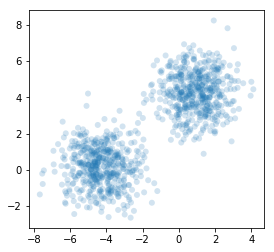

In [4]:
from sklearn import datasets
random.seed(3)

X,_ = datasets.make_blobs(n_samples=1000, centers=2, cluster_std=1.1)

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], alpha=0.2, edgecolor='none');

In [5]:
# Reshape data for broadcasting
m1 = X[np.newaxis, :, :]
m2 = X[:, np.newaxis, :]
print (X.shape)
print (m1.shape)
print (m2.shape)

(1000, 2)
(1, 1000, 2)
(1000, 1, 2)


In [6]:
# Pairwise distances (euclidean)
r = m1 - m2
print (r.shape) #(1000,1000,2)
r *= r 
d2 = r.sum(axis=2)
print (d2.shape)

(1000, 1000, 2)
(1000, 1000)


Symmetric? True


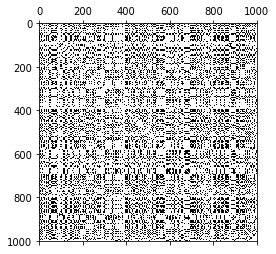

In [7]:
# adjacency matrix with threshold = 4
A = (d2<4)
fill_diagonal(A,False)    #make diagonals zero
A = A.astype(np.float)
print ('Symmetric?', np.allclose(A,A.T) )
spy(A);

4.582613829479384e-14 0.3485695396957686 (1000,) (1000, 1000)


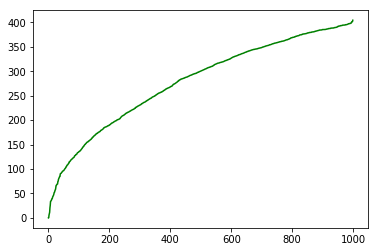

In [8]:
dd = A.sum(axis=0)
D = diag(dd)

L = D - A

w, v = linalg.eigh(L)

print (w[0], w[1], w.shape, v.shape)
plot(w,'g'); #plot eigenvalues

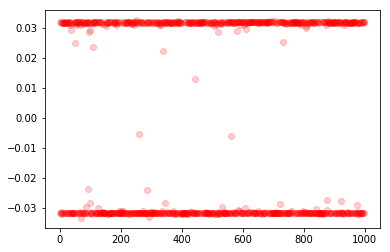

In [9]:
plot(v[:,1], 'or', alpha=0.2); #use 2nd eigenvector, which is first nontrival eigenvector
#horizontal axis is label

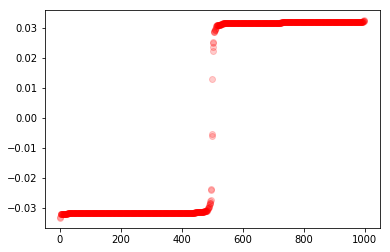

In [10]:
s = argsort(v[:,1])
plot(v[s,1], 'ro', alpha=0.2);

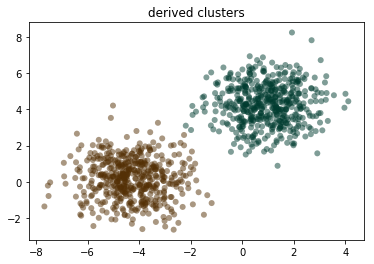

In [11]:
labels = (v[:,1] < 0)
scatter(X[:,0], X[:,1], c=labels, cmap=cm.BrBG, alpha=0.5, edgecolor='none'); title('derived clusters');

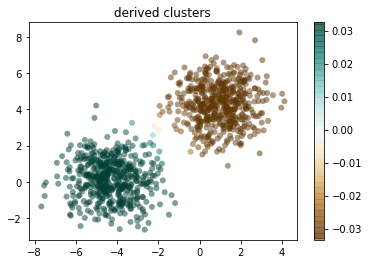

In [12]:
labels = (v[:,1] < 0)
scatter(X[:,0], X[:,1], c=v[:,1], cmap=cm.BrBG, alpha=0.5, edgecolor='none'); title('derived clusters');
colorbar()

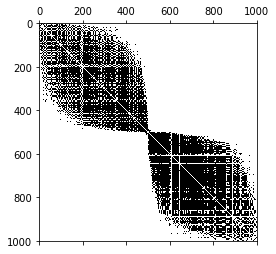

In [13]:
i,j = meshgrid(s,s)
spy(A[i,j]);

### Exercise

In [14]:
X = loadtxt('files/Class-Blobs.csv', delimiter=',')
X.shape

(1000, 2)

### Unhomework

- Cluster the point set below using the spectral method

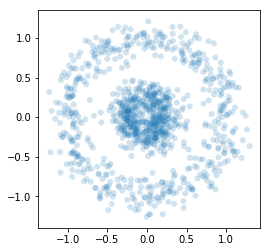

In [15]:
np.random.seed(45)
X,_ = datasets.make_circles(n_samples=1000,factor=0.25, noise=.12)

subplot(111,aspect='equal'); scatter(X[:,0],X[:,1], alpha=0.2,edgecolor='none');